# Linear Regression

José Julián Camacho Hernández

Leonardo Guillén Fernández

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

numpy_time_list = []
listas_time_list = []
torch_time_list = []

### 2.1.1. Regresión Lineal utilizando Numpy

In [149]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)
        #print("X: ", X[:2])
        #print("Y: ", Y[:2])
        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            #print("delta_W: ",delta_W)
            #print("delta_b: ",delta_b)
            self.descent(delta_W, delta_b, learning_rate)      
        return self.W, self.b

    def predict(self, X):
        print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

### 2.1.2. Set de datos básico

In [150]:
df = pd.read_csv("https://raw.githubusercontent.com/SLPeoples/Machine-Learning-A-Z/master/Part%2003%20-%20Classification/16_SVM/Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### 2.1.3. Feature Engineering

In [151]:
# feature engineering
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

((400,), (400,))

### 2.1.4. Regresión lineal sobre el set de datos básico

(180,) (180, 1)


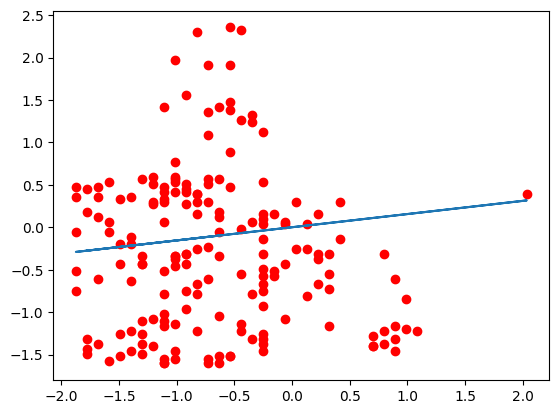

In [152]:
#Instanciar Regresión Lineal de Numpy
reg_numpy = LinearRegression(n_features=1)

#Tomar tiempo de ejecución
start_time = time.time()
params = reg_numpy.train(x, y, epochs=200, learning_rate=0.225)
pred = reg_numpy.predict(np.array(x[:180]))
end_time = time.time()
time_taken_numpy = end_time - start_time
numpy_time_list.append(time_taken_numpy)

#Graficar
plt.scatter(x[:180], y[:180], color='red')
plt.plot(x[:180], pred[:180])

## 2.2.2. Regresión Lineal con Pytorch

In [153]:
import torch

In [154]:
class LinearRegression_Pytorch:

    def __init__(self, n_features):
        self.W = torch.randn(n_features, 1, dtype=torch.double, requires_grad=True)
        self.b = torch.randn(1, dtype=torch.double, requires_grad=True)

    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W.data -= learning_rate*delta_W.data
        self.b.data -= learning_rate*delta_b.data 

    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = torch.sum(((torch.matmul(X.double(), self.W.double()) + self.b.double()) - Y.double()) * X.double(), dim=0) * 2 / X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = torch.sum(((torch.matmul(X.double(), self.W.double()) + self.b.double()) - Y.double()), dim=0) * 2 / X.shape[0]
        return delta_W, delta_b
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = torch.tensor(X, dtype=torch.double).reshape(-1, 1)
        Y = torch.tensor(Y, dtype=torch.double).reshape(-1, 1)

        for i in range(epochs):

            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)



        return self.W.detach().numpy(), self.b.detach().numpy()

    def predict(self, X):
        X = torch.tensor(X).reshape(-1, 1)
        product = torch.matmul(X, self.W) + self.b
        return product.detach().numpy()

In [155]:
# feature engineering
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

((400,), (400,))

### Regresión lineal PyTorch sobre el set de datos básico

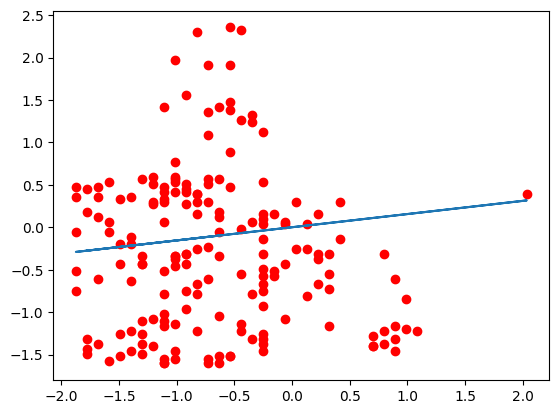

In [156]:
#Instanciar Regresión Lineal de PyTorch
reg_pytorch = LinearRegression_Pytorch(n_features=1)

#Tomar tiempo de ejecución
start_time = time.time()
params = reg_pytorch.train(x, y, epochs=200, learning_rate=0.225)
pred = reg_pytorch.predict(np.array(x[:180]))
end_time = time.time()
time_taken_torch = end_time - start_time
torch_time_list.append(time_taken_torch)

#Graficar
plt.scatter(x[:180], y[:180], color='red')
plt.plot(x[:180], pred[:180])

## 2.2.1. Regresión lineal solo con listas

In [157]:
import random

class LinearRegression_listas:

    def __init__(self, n_features):
        self.W = [[random.gauss(-1, 1)] for i in range(n_features)] #weights
        b = random.random()
        self.b = [b] #intercept
        #print("self.W: ",self.W)
        #print("self.b: ",self.b)

    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W = [[w-learning_rate*delta_W for w in row] for row in self.W]
        self.b = [b-learning_rate*delta_b for b in self.b]


    def my_matmul(self, a, b):
        m = len(a)                  #Obtener filas de a
        n = len(a[0])               #Obtener columnas de a
        m2 = len(b)                 #Obtener filas de b
        n2 = len(b[0])              #Obtener columnas de b
        #Verificar que las dimensiones sean correctas 
        if n != m2:                 
            raise ValueError("Input shapes not compatible for matrix multiplication")
        #Inicializar matriz de resultado
        c = arr = [[0 for j in range(n2)] for i in range(m)] 
        # Multiplicacion de matrices
        for i in range(m):
            for j in range(n2):
                dot_product = 0
                for k in range(n):
                    dot_product += a[i][k] * b[k][j]
                c[i][j] = dot_product
        return c    
    
    def my_sum(self, x):
        total = 0
        for i in range(len(x)):
            for j in range(len(x[0])):
                total += x[i][j]
        return total

    def my_multiply(self, a, b):
        m = len(a)   
        n = len(a[0])
        m2 = len(b)   
        n2 = len(b[0])
        #Validacion
        if m != m2 or n != n2:
            raise ValueError("Input arrays must have the same shape")
        #Inicializar matriz de resultado
        c = arr = [[0 for j in range(n)] for i in range(m)] 
        #Multiplicacion
        for i in range(m):
            for j in range(n):
                c[i][j] = a[i][j] * b[i][j]
        return c
    
    def my_sub(self, a, b):
        c = []
        for i in range(len(a)):
            row = []
            for j in range(len(a[0])):
                row.append(a[i][j] - b[i][j])
            c.append(row)
        return c


    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        #print("X: ", X)
        #print("W: ", self.W)
        tmp0 = (self.my_matmul(X,self.W))
        for i in range(len(tmp0)):
            tmp0[i][0] += self.b[0]
        #print("tmp0: ", tmp0)
        #print("Y: ", Y)
        tmp = self.my_sub(tmp0, Y)
        tmp1 = self.my_multiply(tmp, X)
        delta_W = self.my_sum(tmp1)*2/len(X) 
        #partial derivative of cost w.r.t the intercept
        delta_b = self.my_sum(tmp)*2/len(X)                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = [[x] for x in X]
        Y = [[y] for y in Y]
        #print("X: ", X[:2])
        #print("Y: ", Y[:2])

        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            #print("delta_W: ",delta_W)
            #print("delta_b: ",delta_b)
            self.descent(delta_W, delta_b, learning_rate)
            
        return self.W, self.b

    def predict(self, X):
        X = [[x] for x in X]
        print(len(X[0]), len(X))
        product = self.my_matmul(X,self.W)+self.b
        return product

### Regresión lineal Listas sobre el set de datos básico

In [158]:
# Feature engineering
x = (df['Age']-df['Age'].mean())/df['Age'].std() #standardization of the dataset
y = (df["EstimatedSalary"]-df['EstimatedSalary'].mean())/df["EstimatedSalary"].std()
x.shape, y.shape

((400,), (400,))

1 180


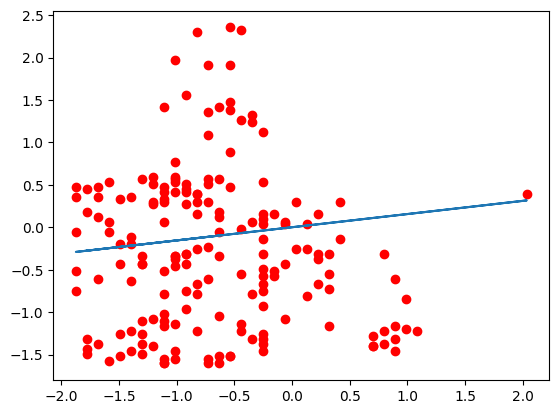

In [159]:
#Instaciar Regresión Lineal Listas
reg_listas = LinearRegression_listas(n_features=1)

#Tomar tiempo de ejecución
start_time = time.time()
params = reg_listas.train(x, y, epochs=200, learning_rate=0.225)
pred = reg_listas.predict(np.array(x[:180]))
end_time = time.time()
time_taken_listas = end_time - start_time
listas_time_list.append(time_taken_listas)

#Graficar
plt.scatter(x[:180], y[:180], color='red')
plt.plot(x[:180], pred[:180])

## Carga y pruebas sobre el set de datos de alturas y pesos

In [160]:
df_hw = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
df_hw.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [161]:
# Feature engineering
x_hw = (df_hw['Height']-df_hw['Height'].mean())/df_hw['Height'].std() #standardization of the dataset
y_hw = (df_hw["Weight"]-df_hw['Weight'].mean())/df_hw["Weight"].std()
x_hw.shape, y_hw.shape

((10000,), (10000,))

### Regresión Lineal Numpy (alturas y pesos)

(180,) (180, 1)


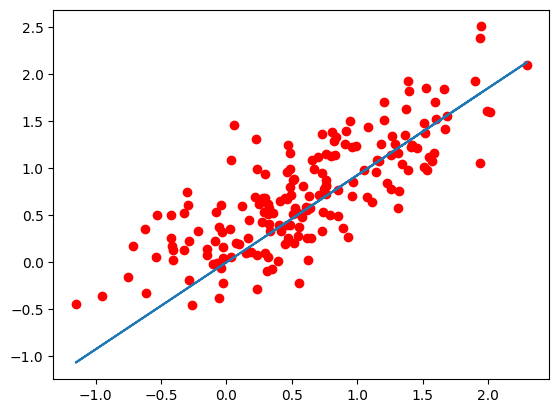

In [162]:
#Tomar tiempo de ejecución para Numpy
start_time = time.time()
params = reg_numpy.train(x_hw, y_hw, epochs=200, learning_rate=0.225)
pred = reg_numpy.predict(np.array(x_hw[:180]))
end_time = time.time()
time_taken_numpy2 = end_time - start_time
numpy_time_list.append(time_taken_numpy2)

plt.scatter(x_hw[:180], y_hw[:180], color='red')
plt.plot(x_hw[:180], pred[:180])

### Regresión Lineal PyTorch (alturas y pesos)

[0.9247563] 2.9981806645610254e-16


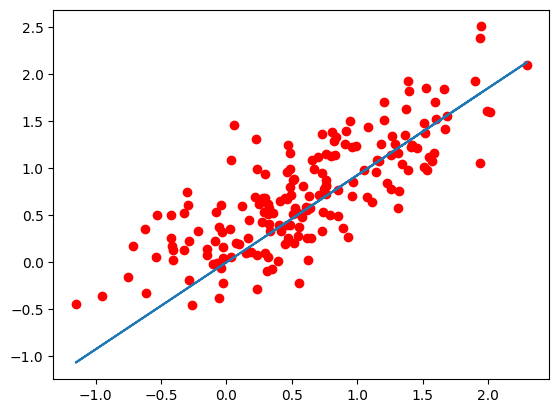

In [163]:
#Tomar tiempo de ejecución para PyTorch
start_time = time.time()
params = reg_pytorch.train(x_hw, y_hw, epochs=200, learning_rate=0.225)
pred = reg_pytorch.predict(np.array(x_hw[:180]))
end_time = time.time()
time_taken_torch2 = end_time - start_time
torch_time_list.append(time_taken_torch2)

print(params[0][-1], params[1][-1])
plt.scatter(x_hw[:180], y_hw[:180], color='red')
plt.plot(x_hw[:180], pred[:180])

### Regresión Lineal Listas (alturas y pesos)

1 180


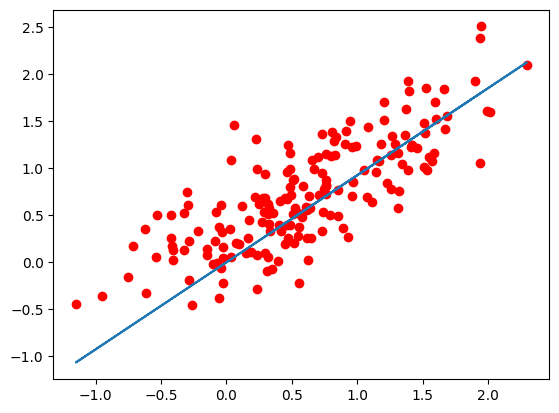

In [164]:
#Tomar tiempo de ejecución para Listas
start_time = time.time()
params = reg_listas.train(x_hw, y_hw, epochs=200, learning_rate=0.225)
pred = reg_listas.predict(np.array(x_hw[:180]))
end_time = time.time()
time_taken_listas2 = end_time - start_time
listas_time_list.append(time_taken_listas2)

plt.scatter(x_hw[:180], y_hw[:180], color='red')
plt.plot(x_hw[:180], pred[:180])

## Carga y pruebas sobre set de datos creado por el grupo
Parte de una cuadrática

In [165]:
def cuad(w, b, n):
    x = np.random.rand(n,1)
    y = (w*x)**2 + b
    return x, y

x_cuad, y_cuad = cuad(9, 3, 25000)
x_cuad.shape, y_cuad.shape

((25000, 1), (25000, 1))

### Regresión Lineal Numpy (set propio)

(180, 1) (180, 1)


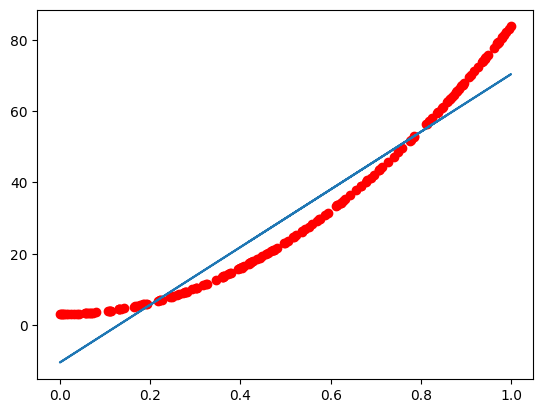

In [166]:
#Ejecución Numpy
start_time = time.time()
params = reg_numpy.train(x_cuad, y_cuad, epochs=200, learning_rate=0.225)
pred = reg_numpy.predict(np.array(x_cuad[:180]))
end_time = time.time()
time_taken_numpy3 = end_time - start_time
numpy_time_list.append(time_taken_numpy3)

plt.scatter(x_cuad[:180], y_cuad[:180], color='red')
plt.plot(x_cuad[:180], pred[:180])

### Regresión Lineal PyTorch (set propio)

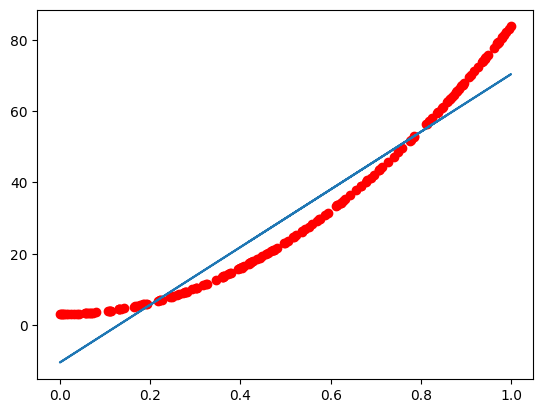

In [167]:
#Ejecución PyTorch
start_time = time.time()
params = reg_pytorch.train(x_cuad, y_cuad, epochs=200, learning_rate=0.225)
pred = reg_pytorch.predict(np.array(x_cuad[:180]))
end_time = time.time()
time_taken_torch3 = end_time - start_time
torch_time_list.append(time_taken_torch3)

plt.scatter(x_cuad[:180], y_cuad[:180], color='red')
plt.plot(x_cuad[:180], pred[:180])

### Regresión Lineal Listas (set propio)

1 180


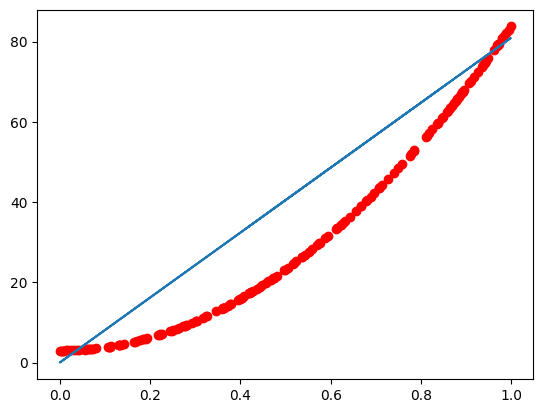

In [168]:
#Ejecución Listas
start_time = time.time()
params = reg_listas.train(x_cuad, y_cuad, epochs=200, learning_rate=0.225)
pred = reg_listas.predict(np.array(x_cuad[:180]))
end_time = time.time()
time_taken_listas3 = end_time - start_time
listas_time_list.append(time_taken_listas3)

extracted_list = [[arr[0].item()] for [arr] in pred[:180]]
plt.scatter(x_cuad[:180], y_cuad[:180], color='red')
plt.plot(x_cuad[:180], extracted_list)

In [169]:
print(numpy_time_list)
print(listas_time_list)
print(torch_time_list)

[0.01947188377380371, 0.04648637771606445, 0.09247422218322754]
[0.3827948570251465, 16.531463861465454, 111.24303674697876]
[0.04307436943054199, 0.09731364250183105, 0.12931323051452637]


## Comparación de tiempo de ejecución 
### de las 3 implementaciones con cada uno de los 3 set de datos

In [170]:
k_values = [1,2,3]
time_data = {
  "Numpy Implementation": numpy_time_list,
  "Lista Implementation": listas_time_list,
  "Torch Implementation": torch_time_list
}
pd.DataFrame(time_data, index = k_values)

,Numpy Implementation,Lista Implementation,Torch Implementation
1,0.019472,0.382795,0.043074
2,0.046486,16.531464,0.097314
3,0.092474,111.243037,0.129313


Se logra observar que la implementación con listas es considerablemente más ineficiente que las demás, ya que en las listas se usan ciclos, mientras que en las otras se utilizan bibliotecas matemáticas optimizadas.